![benchmark](http://media.pennlive.com/davidjones/photo/10094191-large.jpg "starting somewhere...")

### Benchmark Modeling

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
# Imports for Models are in __init__.py file
%run __init__.py

In [4]:
# Start with reading the data from the pickle
teams = pd.read_pickle('data/teams.p')

In [5]:
# Separate the Numeric Columns:

teams_num = teams.select_dtypes(exclude=['object', 'category'])
teams_num.columns

Index([u'yearID', u'G', u'Ghome', u'W', u'L', u'LgWin', u'WSWin', u'R', u'AB',
       u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP', u'SF',
       u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA', u'HRA',
       u'BBA', u'SOA', u'E', u'DP', u'FP', u'attendance', u'BPF', u'PPF',
       u'BA', u'OBP', u'SLG', u'OPS', u'WinP'],
      dtype='object')

### Separate X and y 

In [6]:
# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 

# Make a y2 based upon Winning Leage Series, for possible second model.
y = teams_num['WSWin']
y2 = teams_num['LgWin'] 

In [7]:
X.columns

Index([u'yearID', u'G', u'Ghome', u'R', u'AB', u'H', u'2B', u'3B', u'HR',
       u'BB', u'SO', u'SB', u'CS', u'HBP', u'SF', u'RA', u'ER', u'ERA', u'CG',
       u'SHO', u'SV', u'IPouts', u'HA', u'HRA', u'BBA', u'SOA', u'E', u'DP',
       u'FP', u'attendance', u'BPF', u'PPF', u'BA', u'OBP', u'SLG', u'OPS'],
      dtype='object')

In [8]:
# Train-test split our data...

# Standard split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

# Second split based upon LgWin target:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.4, random_state = 42)

### Logistic Regression:

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.97


In [10]:
pred_logreg = logreg.predict(X_test)

confusion = confusion_matrix(y_test, pred_logreg)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

print("Confusion matrix:\n{}".format(confusion))
print("-----------")
print("Classification report:\n{}".format(classification_report(y_test, pred_logreg)))
print("-----------")
print("ROC AUC Score:\n{}".format(roc_auc_score(y_test, y_pred_prob)))

Confusion matrix:
[[1094    2]
 [  37    1]]
-----------
Classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1096
          1       0.33      0.03      0.05        38

avg / total       0.95      0.97      0.95      1134

-----------
ROC AUC Score:
0.885012485594


In [11]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.90257353 0.93964461 0.91967711 0.88541917 0.85819521]


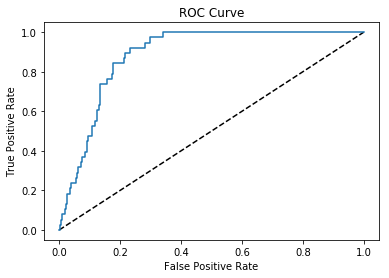

In [12]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### KNeighborsClassifier:

In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.97


In [14]:
pred_knn = knn.predict(X_test)

confusion_knn = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion_knn))
print("-----------")
print("Classification report:\n{}".format(classification_report(y_test, pred_knn)))
print("-----------")
y_pred_prob = knn.predict_proba(X_test)[:,1]
print("ROC AUC Score:\n{}".format(roc_auc_score(y_test, y_pred_prob)))

Confusion matrix:
[[1096    0]
 [  38    0]]
-----------
Classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1096
          1       0.00      0.00      0.00        38

avg / total       0.93      0.97      0.95      1134

-----------
ROC AUC Score:
0.540013926239


/Users/johnphillips/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.5692402  0.59083946 0.40505115 0.61265914 0.47902154]


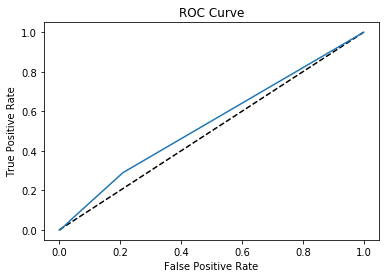

In [16]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Decision Tree:

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(dtc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(dtc.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.93


In [18]:
pred_dtc = dtc.predict(X_test)

confusion_dtc = confusion_matrix(y_test, pred_dtc)
print("Confusion matrix:\n{}".format(confusion_dtc))
print("-----------")
print("Classification report:\n{}".format(classification_report(y_test, pred_dtc)))
print("-----------")
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print("ROC AUC Score:\n{}".format(roc_auc_score(y_test, y_pred_prob)))

Confusion matrix:
[[1045   51]
 [  32    6]]
-----------
Classification report:
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1096
          1       0.11      0.16      0.13        38

avg / total       0.94      0.93      0.93      1134

-----------
ROC AUC Score:
0.555680945063


In [19]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(dtc, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.54932598 0.56709559 0.60469949 0.59212107 0.54588037]


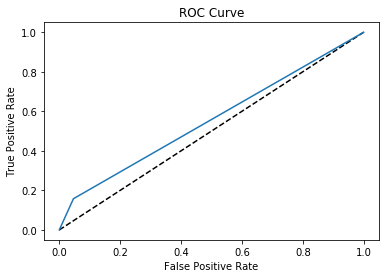

In [20]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = dtc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Random Forest Classifier:

In [21]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=43)
rfc.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.97


In [23]:
pred_rfc = rfc.predict(X_test)

confusion = confusion_matrix(y_test, pred_rfc)

y_pred_prob = rfc.predict_proba(X_test)[:,1]

print("Confusion matrix:\n{}".format(confusion))
print("-----------")
print("Classification report:\n{}".format(classification_report(y_test, pred_rfc)))
print("-----------")
print("ROC AUC Score:\n{}".format(roc_auc_score(y_test, y_pred_prob)))

Confusion matrix:
[[1095    1]
 [  37    1]]
-----------
Classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1096
          1       0.50      0.03      0.05        38

avg / total       0.95      0.97      0.95      1134

-----------
ROC AUC Score:
0.795932577795


In [24]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.66425398 0.79645374 0.73693254 0.67899752 0.67515414]


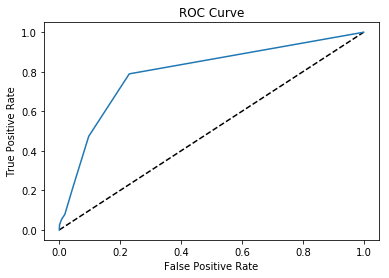

In [25]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Remember this:
* Only 4.1% of Teams have won World Series!
* Thus 95.8% of Teams do not win it.
* We can guess a Team will not win WS, and we will be correct 95.8% of the time...